In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [ ]:
df = pd.read_csv('/content/concrete_data.csv')


In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

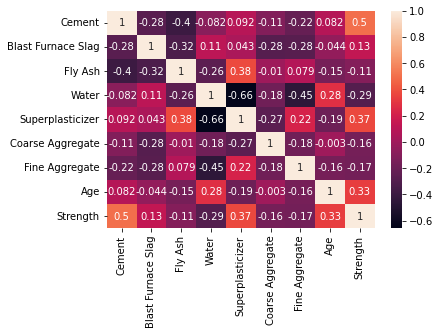

In [ ]:
sns.heatmap(df.corr(), annot = True)

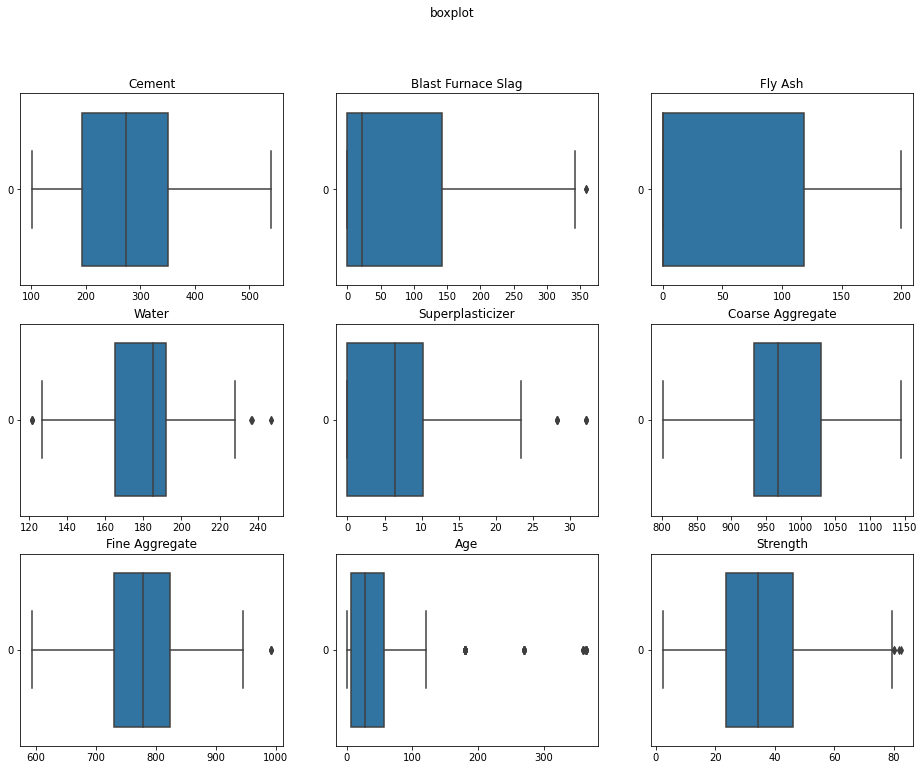

In [ ]:
fig,axs = plt.subplots(3,3, figsize=(16,12))
axs = axs.flatten()
fig.suptitle('boxplot')

for i, data in enumerate(df.columns):

  sns.boxplot( data=df[data], orient='h', ax=axs[i])
  axs[i].set_title(data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

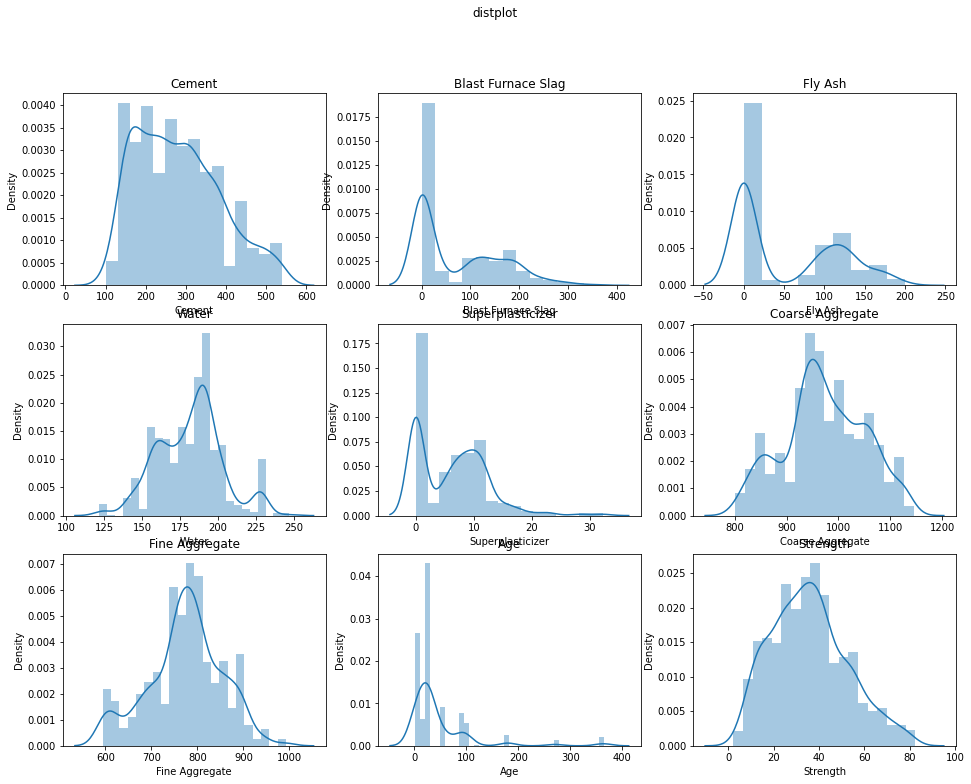

In [ ]:
fig,axs = plt.subplots(3,3, figsize=(16,12))
axs = axs.flatten()
fig.suptitle('distplot')

for i, data in enumerate(df.columns):

  sns.distplot( df[data],bins = None, ax=axs[i])
  axs[i].set_title(data)



In [ ]:
Q1 = df[df.columns].quantile(0.25)
Q3 = df[df.columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_filtered = df[~((df[df.columns] < (Q1 - 1.5 * IQR)) |(df[df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_filtered.shape)



Here we will get IQR for each column
 Cement                157.625
Blast Furnace Slag    142.950
Fly Ash               118.300
Water                  27.100
Superplasticizer       10.200
Coarse Aggregate       97.400
Fine Aggregate         93.050
Age                    49.000
Strength               22.425
dtype: float64


(941, 9)

In [ ]:
df_filtered.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.262949,-0.373968,-0.088639,0.032001,-0.099472,-0.239603,-0.036289,0.476763
Blast Furnace Slag,-0.262949,1.000000,-0.351422,0.113790,0.043895,-0.290074,-0.295298,-0.036781,0.141416
Fly Ash,-0.373968,-0.351422,1.000000,-0.250416,0.453972,-0.038463,0.064153,0.054812,-0.054794
Water,-0.088639,0.113790,-0.250416,1.000000,-0.641187,-0.208393,-0.364145,-0.022208,-0.369219
Superplasticizer,0.032001,0.043895,0.453972,-0.641187,1.000000,-0.224616,0.114265,0.045529,0.402702
Coarse Aggregate,-0.099472,-0.290074,-0.038463,-0.208393,-0.224616,1.000000,-0.179809,0.021818,-0.168207
Fine Aggregate,-0.239603,-0.295298,0.064153,-0.364145,0.114265,-0.179809,1.000000,0.045744,-0.156866
Age,-0.036289,-0.036781,0.054812,-0.022208,0.045529,0.021818,0.045744,1.000000,0.517506
Strength,0.476763,0.141416,-0.054794,-0.369219,0.402702,-0.168207,-0.156866,0.517506,1.000000


<AxesSubplot:>

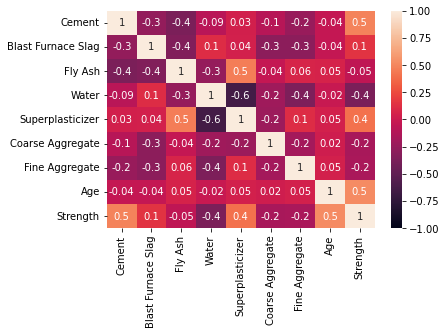

In [ ]:
sns.heatmap(df_filtered.corr(), vmax=1, vmin= -1,fmt='.1g', annot= True)

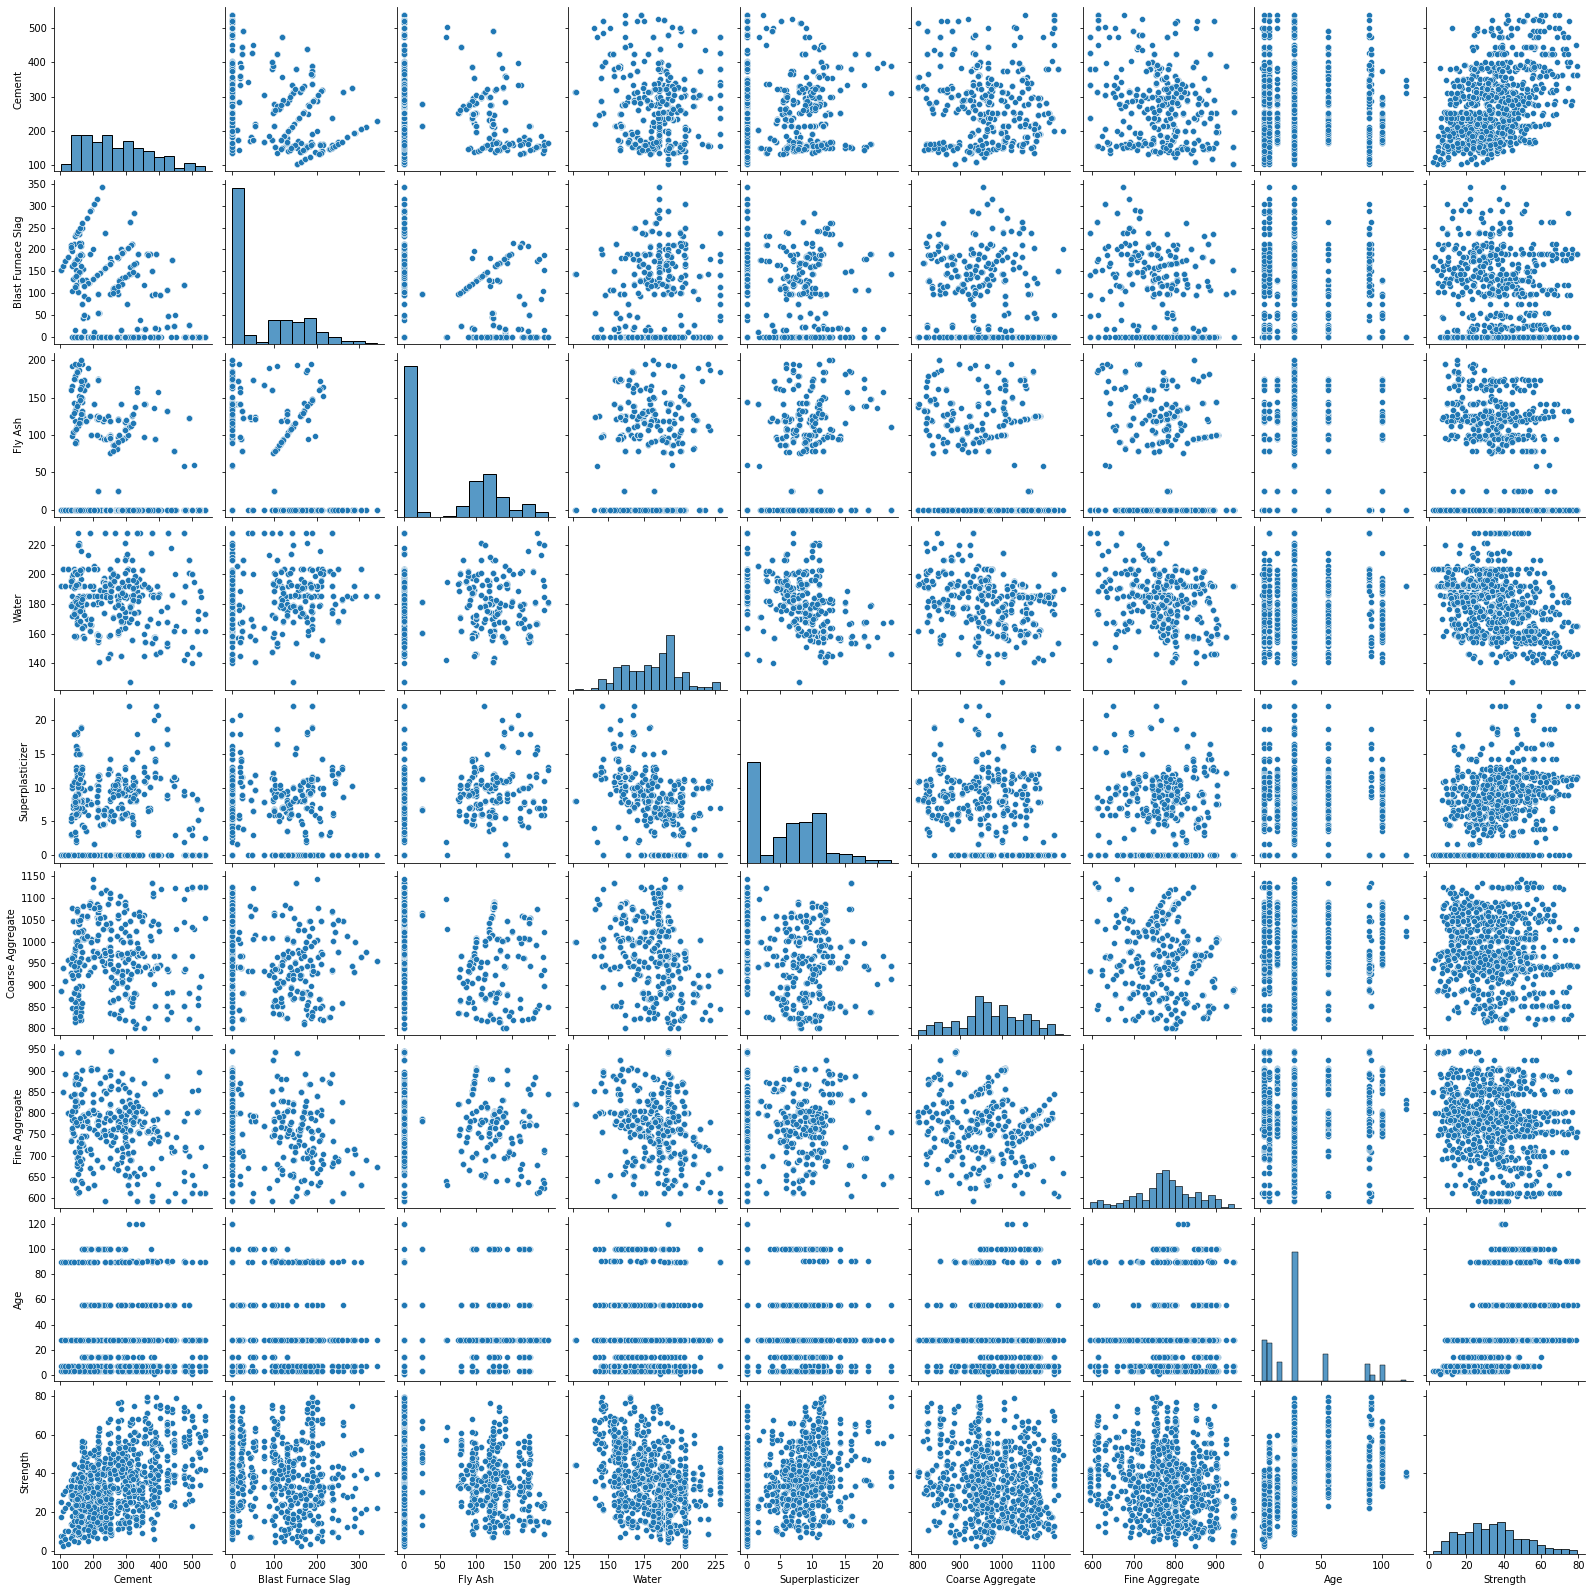

In [ ]:
sns.pairplot(data= df_filtered)

In [ ]:
x = df.drop(['Strength'], axis=1)
y = df['Strength']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

score = np.sqrt(mean_squared_error(y_pred, y_test))
print(score)



9.675677546609508


In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
# Fit new DT on training data
dtr.fit(x_train, y_train)


CPU times: user 7.54 ms, sys: 920 µs, total: 8.46 ms
Wall time: 8.75 ms


DecisionTreeRegressor()

In [ ]:
y_pred = dtr.predict(x_test)
score = np.sqrt(mean_squared_error(y_pred, y_test))
print(score)

7.488027498964111


In [ ]:
rf = RandomForestRegressor(n_estimators= 250)
rf.fit(x_train,y_train)
y_pred_rfr = rf.predict(x_test)

In [ ]:
score = np.sqrt(mean_squared_error(y_pred_rfr, y_test))
print(score)

5.199665147016827


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_jobs= -1)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [ ]:
score = np.sqrt(mean_squared_error(y_pred_xgb, y_test))
print(score)

4.9178854140499615
